**Homework 4- Problem 2-3- Changes on LSTM Model**

In [1]:
!pip install d2l==1.0.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
%matplotlib inline
!pip install matplotlib-inline
import sys
!{sys.executable} -m pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
import time
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
%matplotlib inline
from torchvision import transforms
import torchvision.datasets as datasets
from torchvision import datasets, transforms
import torch.optim as optim
from d2l import torch as d2l
from torch.optim import lr_scheduler

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
class LSTM(d2l.RNN): 
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout=0.5):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens, num_layers, dropout=dropout)

In [10]:
data = d2l.TimeMachine(batch_size=256, num_steps=32)
lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=32, num_layers=3)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=0.5)
model.predict('it has', 30, data.vocab)

'it hasgggggggggggggggggggggggggggggg'

In [11]:
model

RNNLM(
  (rnn): LSTM(
    (rnn): LSTM(28, 32, num_layers=3, dropout=0.5)
  )
  (linear): Linear(in_features=32, out_features=28, bias=True)
)

In [12]:
pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
RNNLM                                    --
├─LSTM: 1-1                              --
│    └─LSTM: 2-1                         24,832
├─Linear: 1-2                            924
Total params: 25,756
Trainable params: 25,756
Non-trainable params: 0

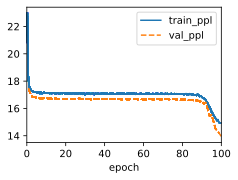

In [14]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [15]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has ta ae ae ae ae ae a'

In [16]:
model.predict('it has', 100, data.vocab, d2l.try_gpu())

'it has ta ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae '

**Homework 4- Problem 2-3- Changes on GRU Model**

In [17]:
class GRU(d2l.RNN): 
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout=0.5):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens, num_layers, dropout=dropout)

In [18]:
data = d2l.TimeMachine(batch_size=256, num_steps=32)
gru = GRU(num_inputs=len(data.vocab), num_hiddens=32, num_layers=3)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=0.5)
model.predict('it has', 30, data.vocab)

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


'it hasrrwrgwrrrrrdwwwwwrrrrwwrwwwwwr'

In [19]:
model

RNNLM(
  (rnn): GRU(
    (rnn): GRU(28, 32, num_layers=3, dropout=0.5)
  )
  (linear): Linear(in_features=32, out_features=28, bias=True)
)

In [20]:
pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
RNNLM                                    --
├─GRU: 1-1                               --
│    └─GRU: 2-1                          18,624
├─Linear: 1-2                            924
Total params: 19,548
Trainable params: 19,548
Non-trainable params: 0

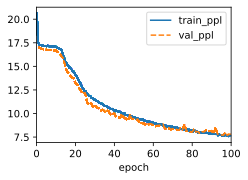

In [22]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [23]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has the the the the the'

In [24]:
model.predict('it has', 100, data.vocab, d2l.try_gpu())

'it has the the the the the the the the the the the the the the the the the the the the the the the the the'